In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn styling (no need to pass 'seaborn' to plt.style)
sns.set()

# Read the CSV file
df = pd.read_csv('assign4/all-data.csv', encoding="ISO-8859-1")
print(df.head())


    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [4]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [7]:
print(df.columns)


Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')


In [8]:
df.columns = ['Sentiment', 'Text']


In [10]:
print(df.columns)   

Index(['Sentiment', 'Text'], dtype='object')


In [11]:
print(df['Sentiment'].value_counts())

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64


In [24]:
y=df['Sentiment'].values
y.shape

(4845,)

In [25]:
x=df['Text'].values

In [26]:
x.shape

(4845,)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1938,)

In [29]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})  


In [30]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [31]:
df_train.head()

,news,sentiment
0,Finnair PLC carried a record 8.8 million passe...,positive
1,"According to Olvi , the company is already neg...",neutral
2,Finnish automation solutions developer Cencorp...,positive
3,"Glaston 's well-known brands are Bavelloni , i...",neutral
4,The total service concept also includes techno...,neutral


In [32]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})  

In [33]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [34]:
df_test.head()

,news,sentiment
0,The company said that currently the French dis...,positive
1,"In its financial report , published on Friday ...",neutral
2,"a January 11 , 2010 EPHC board of directors ha...",positive
3,TeliaSonera is the leading telecommunications ...,neutral
4,The company also appointed Leif Rosen head of ...,neutral


In [35]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [37]:
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [38]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,Finnair PLC carried a record 88 million passen...,positive
1,According to Olvi the company is already nego...,neutral
2,Finnish automation solutions developer Cencorp...,positive
3,Glaston s wellknown brands are Bavelloni in p...,neutral
4,The total service concept also includes techno...,neutral


In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shruti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [42]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

Creating Unigrams

In [43]:
from collections import defaultdict

In [44]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [45]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['Finnair', 'PLC', 'carried', 'record', '88', 'million', 'passengers', '2006', '', 'increase', '35', 'percent', 'previous', 'year', '', 'Finnish', 'national', 'carrier', 'reported', 'Tuesday', '']
Sentence after removing stopwords: ['Finnish', 'automation', 'solutions', 'developer', 'Cencorp', 'Corporation', '', 'OMX', 'Helsinki', '', 'CNC1V', '', 'said', 'Friday', '', '27', 'June', '', 'completed', 'employee', 'negotiations', 'regarding', 'reorganisation', 'operations', '']
Sentence after removing stopwords: ['Talentum', 'expects', 'net', 'sales', 'core', 'business', 'increase', '2008', '', 'compared', '2007', '']
Sentence after removing stopwords: ['The', 'stock', 'rose', 'second', 'day', 'Wednesday', 'bringing', 'twoday', 'rise', 'GBX12', '0', '20', '', '']
Sentence after removing stopwords: ['Finland', 'Neste', 'Oil', 'awarded', 'Chemical', 'Industry', 'Federation', 'Finland', 'Innovation', 'Award', 'NExBTL', 'technology', '', 'enables', 'biodiese

In [46]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['Net', 'sales', 'Paper', 'segment', 'decreased', 'EUR', '2216', 'mn', 'second', 'quarter', '2009', 'EUR', '2411', 'mn', 'second', 'quarter', '2008', '', 'operating', 'profit', 'excluding', 'nonrecurring', 'items', 'rose', 'EUR', '80', 'mn', 'EUR', '76', 'mn', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '122', 'mn', '', 'EUR', '356', 'mn', 'first', 'quarter', '2008', '']
Sentence after removing stopwords: ['Finnish', 'construction', 'company', 'YIT', 'reducing', 'number', 'startups', 'marketfinanced', 'residential', 'units', '2007', '2300', 'previously', 'announced', '2700', '']
Sentence after removing stopwords: ['We', 'also', 'cut', 'price', 'projections', 'paper', 'packaging', '', '', 'analyst', 'Goldman', 'Sachs', 'said', 'note', 'Monday', '']
Sentence after removing stopwords: ['The', 'company', 'profit', 'totaled', 'Ls', '578100', 'H1', '2007', '', '309', '', 'yearonyear', '']
Sentence after removing stopwor

In [47]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['According', 'Olvi', '', 'company', 'already', 'negotiating', 'new', 'agreements', '']
Sentence after removing stopwords: ['Glaston', 'wellknown', 'brands', 'Bavelloni', '', 'preprocessing', 'machines', 'tools', '', 'Tamglass', 'Uniglass', 'safety', 'glass', 'machines', 'Albat', '', 'Wirsam', 'software', 'solutions', '']
Sentence after removing stopwords: ['The', 'total', 'service', 'concept', 'also', 'includes', 'technology', 'services', '', 'Raute', 'supports', 'customers', 'throughout', 'entire', 'life', 'cycle', 'investments', '']
Sentence after removing stopwords: ['Tekla', 'software', 'solutions', 'make', 'customers', '', 'core', 'processes', 'effective', 'building', 'construction', '', 'energy', 'distribution', '', 'infrastructure', 'management', 'water', 'supply', '']
Sentence after removing stopwords: ['This', 'implementation', 'important', 'operator', '', 'since', 'launch', 'FixedtoMobile', 'convergence', 'service', 'Brazil', 'see', 'Brazil

In [48]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [49]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [50]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [51]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

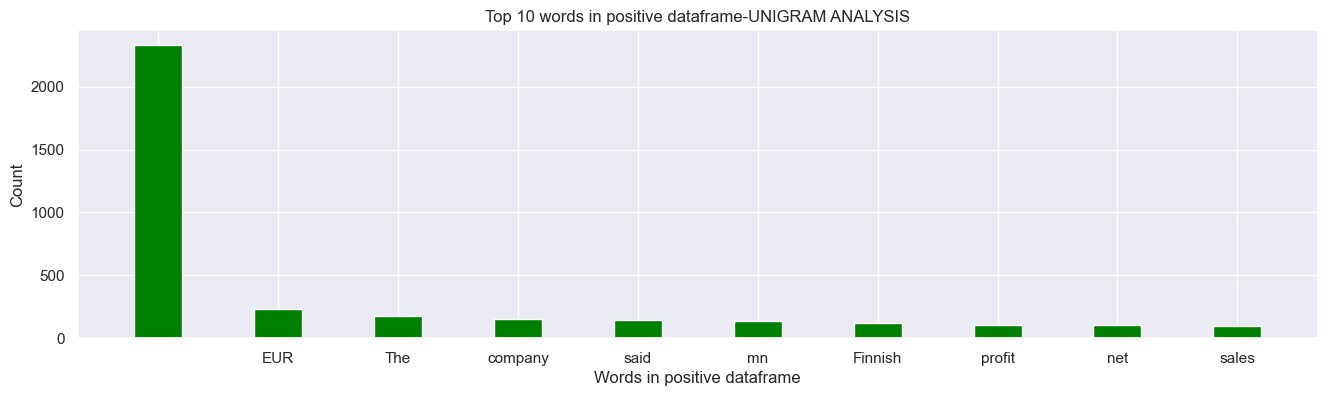

In [52]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

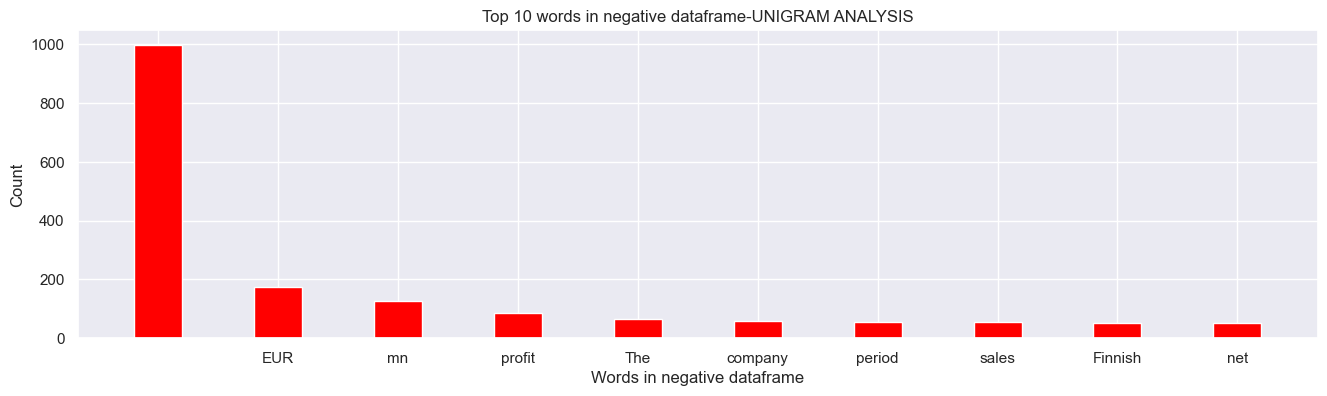

In [53]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

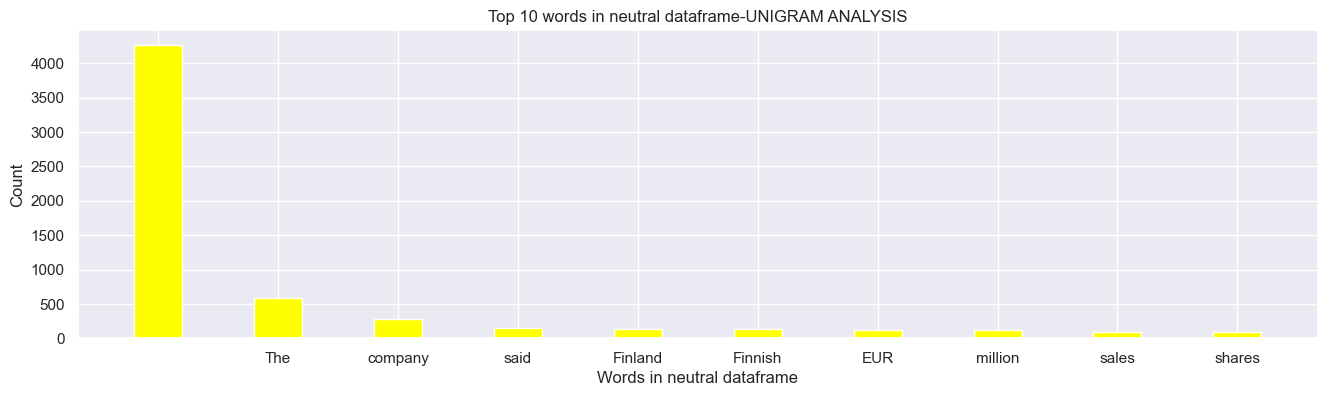

In [54]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

Creating Bigrams

In [55]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['Finnair', 'PLC', 'carried', 'record', '88', 'million', 'passengers', '2006', '', 'increase', '35', 'percent', 'previous', 'year', '', 'Finnish', 'national', 'carrier', 'reported', 'Tuesday', '']
Sentence after removing stopwords: ['Finnish', 'automation', 'solutions', 'developer', 'Cencorp', 'Corporation', '', 'OMX', 'Helsinki', '', 'CNC1V', '', 'said', 'Friday', '', '27', 'June', '', 'completed', 'employee', 'negotiations', 'regarding', 'reorganisation', 'operations', '']
Sentence after removing stopwords: ['Talentum', 'expects', 'net', 'sales', 'core', 'business', 'increase', '2008', '', 'compared', '2007', '']
Sentence after removing stopwords: ['The', 'stock', 'rose', 'second', 'day', 'Wednesday', 'bringing', 'twoday', 'rise', 'GBX12', '0', '20', '', '']
Sentence after removing stopwords: ['Finland', 'Neste', 'Oil', 'awarded', 'Chemical', 'Industry', 'Federation', 'Finland', 'Innovation', 'Award', 'NExBTL', 'technology', '', 'enables', 'biodiese

In [57]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['Net', 'sales', 'Paper', 'segment', 'decreased', 'EUR', '2216', 'mn', 'second', 'quarter', '2009', 'EUR', '2411', 'mn', 'second', 'quarter', '2008', '', 'operating', 'profit', 'excluding', 'nonrecurring', 'items', 'rose', 'EUR', '80', 'mn', 'EUR', '76', 'mn', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '122', 'mn', '', 'EUR', '356', 'mn', 'first', 'quarter', '2008', '']
Sentence after removing stopwords: ['Finnish', 'construction', 'company', 'YIT', 'reducing', 'number', 'startups', 'marketfinanced', 'residential', 'units', '2007', '2300', 'previously', 'announced', '2700', '']
Sentence after removing stopwords: ['We', 'also', 'cut', 'price', 'projections', 'paper', 'packaging', '', '', 'analyst', 'Goldman', 'Sachs', 'said', 'note', 'Monday', '']
Sentence after removing stopwords: ['The', 'company', 'profit', 'totaled', 'Ls', '578100', 'H1', '2007', '', '309', '', 'yearonyear', '']
Sentence after removing stopwor

In [58]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['According', 'Olvi', '', 'company', 'already', 'negotiating', 'new', 'agreements', '']
Sentence after removing stopwords: ['Glaston', 'wellknown', 'brands', 'Bavelloni', '', 'preprocessing', 'machines', 'tools', '', 'Tamglass', 'Uniglass', 'safety', 'glass', 'machines', 'Albat', '', 'Wirsam', 'software', 'solutions', '']
Sentence after removing stopwords: ['The', 'total', 'service', 'concept', 'also', 'includes', 'technology', 'services', '', 'Raute', 'supports', 'customers', 'throughout', 'entire', 'life', 'cycle', 'investments', '']
Sentence after removing stopwords: ['Tekla', 'software', 'solutions', 'make', 'customers', '', 'core', 'processes', 'effective', 'building', 'construction', '', 'energy', 'distribution', '', 'infrastructure', 'management', 'water', 'supply', '']
Sentence after removing stopwords: ['This', 'implementation', 'important', 'operator', '', 'since', 'launch', 'FixedtoMobile', 'convergence', 'service', 'Brazil', 'see', 'Brazil

In [59]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues


df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [60]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]


In [61]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [62]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

In [63]:
plt.figure(1,figsize=(16,4))

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

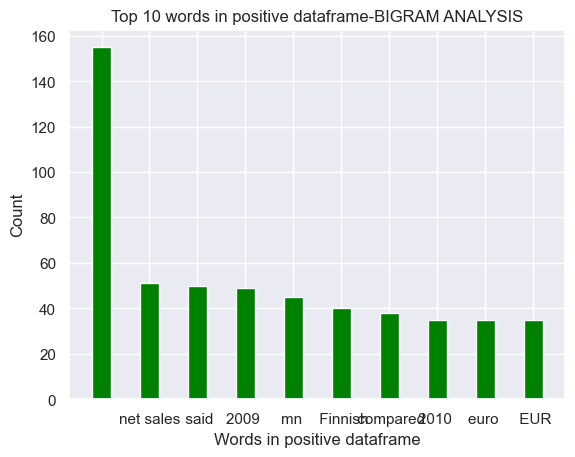

In [64]:
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()


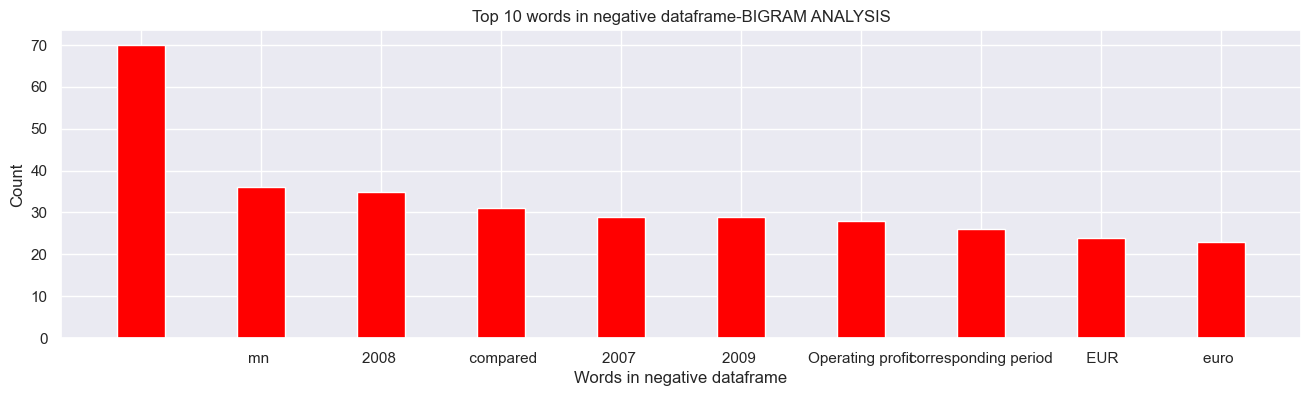

In [65]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

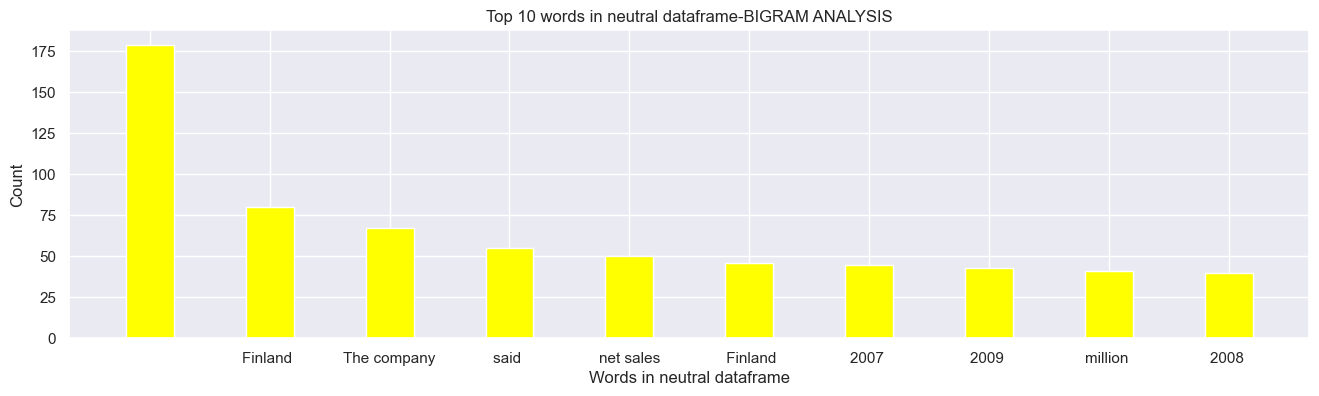

In [66]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

Creating Trigrams

In [67]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [68]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['Finnair', 'PLC', 'carried', 'record', '88', 'million', 'passengers', '2006', '', 'increase', '35', 'percent', 'previous', 'year', '', 'Finnish', 'national', 'carrier', 'reported', 'Tuesday', '']
Sentence after removing stopwords: ['Finnish', 'automation', 'solutions', 'developer', 'Cencorp', 'Corporation', '', 'OMX', 'Helsinki', '', 'CNC1V', '', 'said', 'Friday', '', '27', 'June', '', 'completed', 'employee', 'negotiations', 'regarding', 'reorganisation', 'operations', '']
Sentence after removing stopwords: ['Talentum', 'expects', 'net', 'sales', 'core', 'business', 'increase', '2008', '', 'compared', '2007', '']
Sentence after removing stopwords: ['The', 'stock', 'rose', 'second', 'day', 'Wednesday', 'bringing', 'twoday', 'rise', 'GBX12', '0', '20', '', '']
Sentence after removing stopwords: ['Finland', 'Neste', 'Oil', 'awarded', 'Chemical', 'Industry', 'Federation', 'Finland', 'Innovation', 'Award', 'NExBTL', 'technology', '', 'enables', 'biodiese

In [69]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['Net', 'sales', 'Paper', 'segment', 'decreased', 'EUR', '2216', 'mn', 'second', 'quarter', '2009', 'EUR', '2411', 'mn', 'second', 'quarter', '2008', '', 'operating', 'profit', 'excluding', 'nonrecurring', 'items', 'rose', 'EUR', '80', 'mn', 'EUR', '76', 'mn', '']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '122', 'mn', '', 'EUR', '356', 'mn', 'first', 'quarter', '2008', '']
Sentence after removing stopwords: ['Finnish', 'construction', 'company', 'YIT', 'reducing', 'number', 'startups', 'marketfinanced', 'residential', 'units', '2007', '2300', 'previously', 'announced', '2700', '']
Sentence after removing stopwords: ['We', 'also', 'cut', 'price', 'projections', 'paper', 'packaging', '', '', 'analyst', 'Goldman', 'Sachs', 'said', 'note', 'Monday', '']
Sentence after removing stopwords: ['The', 'company', 'profit', 'totaled', 'Ls', '578100', 'H1', '2007', '', '309', '', 'yearonyear', '']
Sentence after removing stopwor

In [70]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['According', 'Olvi', '', 'company', 'already', 'negotiating', 'new', 'agreements', '']
Sentence after removing stopwords: ['Glaston', 'wellknown', 'brands', 'Bavelloni', '', 'preprocessing', 'machines', 'tools', '', 'Tamglass', 'Uniglass', 'safety', 'glass', 'machines', 'Albat', '', 'Wirsam', 'software', 'solutions', '']
Sentence after removing stopwords: ['The', 'total', 'service', 'concept', 'also', 'includes', 'technology', 'services', '', 'Raute', 'supports', 'customers', 'throughout', 'entire', 'life', 'cycle', 'investments', '']
Sentence after removing stopwords: ['Tekla', 'software', 'solutions', 'make', 'customers', '', 'core', 'processes', 'effective', 'building', 'construction', '', 'energy', 'distribution', '', 'infrastructure', 'management', 'water', 'supply', '']
Sentence after removing stopwords: ['This', 'implementation', 'important', 'operator', '', 'since', 'launch', 'FixedtoMobile', 'convergence', 'service', 'Brazil', 'see', 'Brazil

In [71]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [72]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [73]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]


In [74]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

Text(0.5, 1.0, 'Top 10 words in positive dataframe-TRIGRAM ANALYSIS')

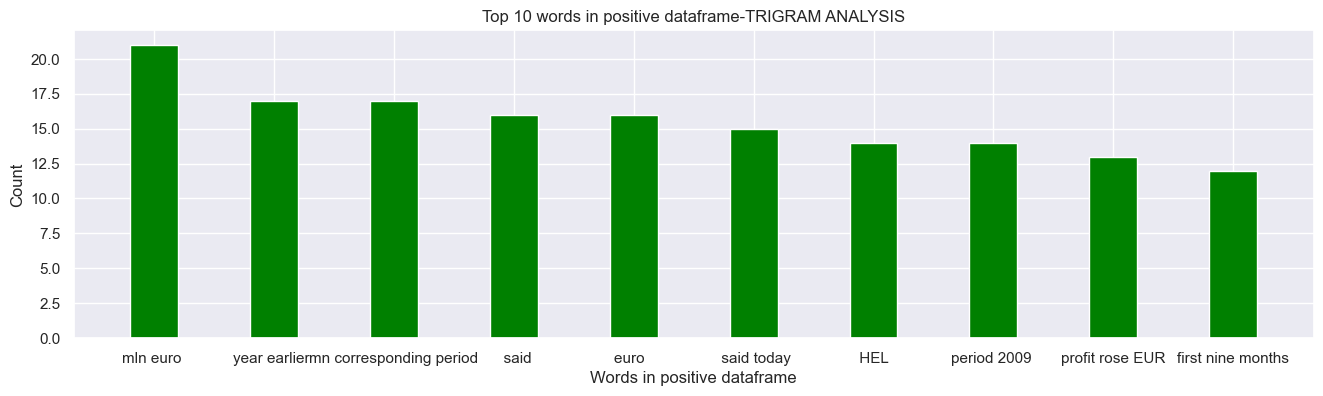

In [75]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

In [76]:
plt.savefig("positive-trigram.png")

<Figure size 640x480 with 0 Axes>

In [77]:
plt.show()

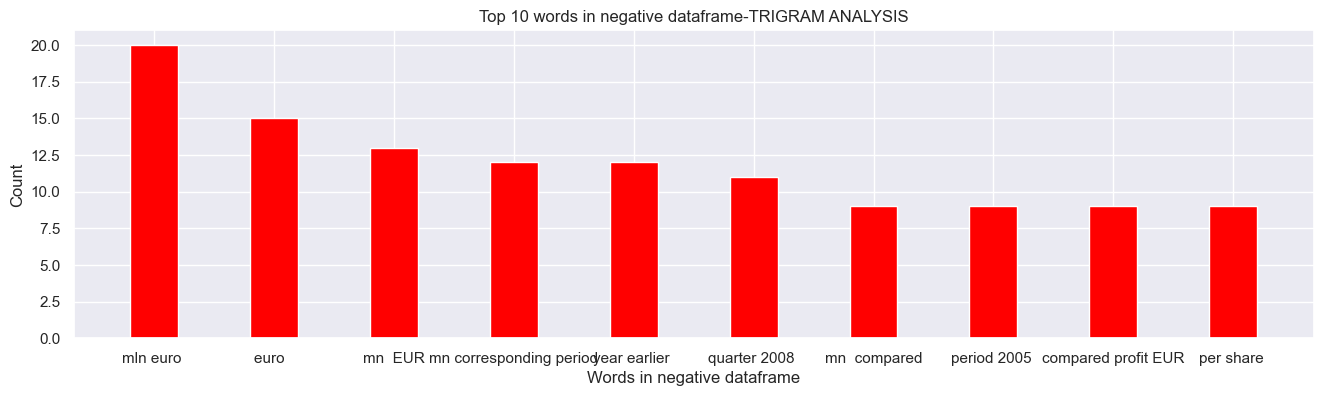

In [78]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

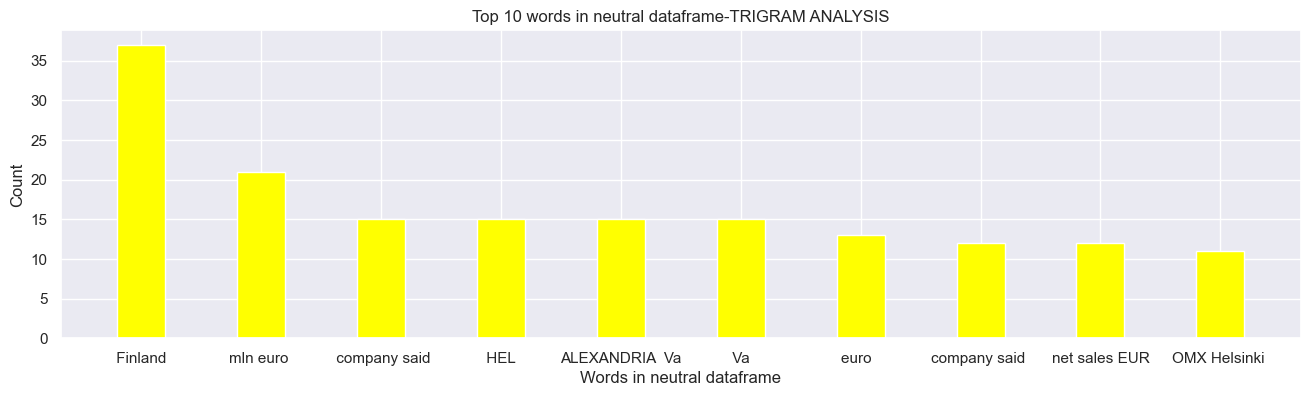

In [79]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()